## SQL Bonus

In [2]:
# Dependencies
import psycopg2 as pg
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float


In [3]:
from config import password

In [4]:
# Create engine

# variables to populate the database connection string
db_user = 'postgres'
db_password = password
db_host = 'localhost'
db_port = 5432

# This database must already exist
db_name = "SQL_Homework_Employee_Database"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")


In [5]:
Base.metadata.create_all(engine)

In [6]:
# Convert salaries table to dataframe
salaries_df = pd.read_sql_query("SELECT * FROM Salaries", engine)
salaries_df.head()


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [7]:
# Convert title table to dataframe
title_df = pd.read_sql_query("SELECT * FROM titles", engine)
title_df.head()


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [8]:
# Convert employees table to dataframe
pre_employees_df = pd.read_sql_query("SELECT * FROM employees", engine)
pre_employees_df.head()
employees_df=pre_employees_df.rename(columns={"emp_no": "emp_no", "emp_title_id": "title_id", "birth_date": "birth_date", "first_name": "first_name", 
                                              "last_name": "last_name", "sex": "sex", "hire_date": "hire_date"})
employees_df.head()


,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [9]:
# Convert department employee table to dataframe
department_employee_df = pd.read_sql_query("SELECT * FROM dept_emp", engine)
department_employee_df.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [10]:
# Convert department table to dataframe
department_df = pd.read_sql_query("SELECT * FROM departments", engine)
department_df.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [11]:
# Convert titles table to dataframe
titles_df = pd.read_sql_query("SELECT * FROM titles", engine)
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [12]:
# Merge employees and salaries dataframe 

salaries_employees = pd.merge(salaries_df,employees_df,on="emp_no", how="inner")
salaries_employees.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [13]:
# Merge employees and salaries dataframe with titles
salaries_employees_titles = pd.merge(salaries_employees, titles_df, on="title_id", how="inner")
salaries_employees_titles.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer


In [14]:
# Mean salaries by title

mean_salaries_title_df = salaries_employees_titles.groupby("title").mean()
mean_salaries_title_df = mean_salaries_title_df.sort_values(by='salary', ascending = False)
mean_salaries_title_df

# Drop the employee number
pre_mean_salary_by_position = mean_salaries_title_df.drop(columns = "emp_no")
pre_mean_salary_by_position



,salary
title,
Senior Staff,58550.172704
Staff,58465.382850
Manager,51531.041667
Technique Leader,48582.896092
Assistant Engineer,48564.434447
Engineer,48535.336511
Senior Engineer,48506.799871


<Figure size 720x360 with 0 Axes>

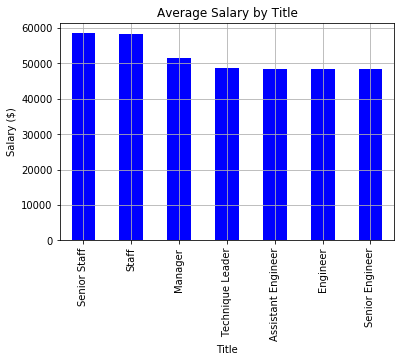

In [17]:
# Generate a bar plot showing average salary by position
mean_salary_by_position = pre_mean_salary_by_position[["salary"]]

# Use DataFrame.plot to create a bar chart
plt.figure(figsize=(10,5))
mean_salary_by_position.plot(kind="bar", color = "b", legend = False)

# Add titles. 
plt.xlabel("Title")
plt.ylabel("Salary ($)")
plt.title("Average Salary by Title")
plt.grid(True)
plt.show
plt.savefig('Average_Salary_By_Title.png', bbox_inches='tight')